# Think Bayes

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [12]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Beta, MakeBinomialPmf

import thinkplot

import numpy as np

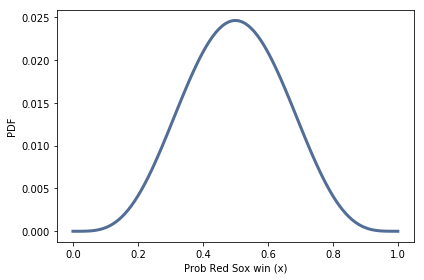

In [25]:
beta = Beta(5, 5)
prior = beta.MakePmf()
thinkplot.Pdf(prior)
thinkplot.decorate(xlabel='Prob Red Sox win (x)',
                   ylabel='PDF')

In [26]:
%psource beta.Update

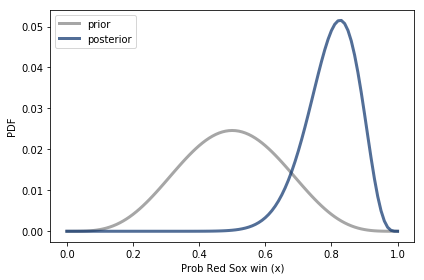

In [27]:
beta.Update((15, 0))
posterior = beta.MakePmf()

thinkplot.Pdf(prior, color='gray', label='prior')
thinkplot.Pdf(posterior, label='posterior')
thinkplot.decorate(xlabel='Prob Red Sox win (x)',
                   ylabel='PDF')

In [28]:
posterior.Mean()

0.8000000040157967

In [29]:
posterior.MAP()

0.83

In [30]:
posterior.CredibleInterval()

(0.66, 0.91)

In [31]:
x = posterior.Random()

0.94

In [32]:
np.sum(np.random.random(7) < x)

7

In [33]:
def simulate(k, dist):
    x = dist.Random()
    return np.sum(np.random.random(k) <= x)
    
simulate(7, posterior)

6

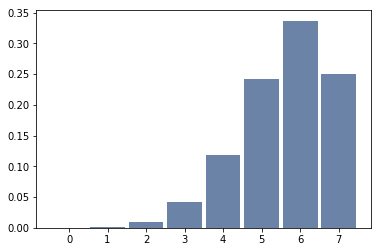

In [34]:
sample = [simulate(7, posterior) for i in range(100000)];
thinkplot.Hist(Pmf(sample))

In [35]:
np.mean(np.array(sample) >= 4)

0.94716